# Data Analysis on pizza store dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns

In [2]:
pa = pd.read_csv('Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_May19.csv',
                 encoding='latin1', parse_dates=['dateAdded','dateUpdated','menus.dateSeen'])

In [3]:
pa.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30 05:05:40,2019-05-01 15:43:09,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02 04:02:49,2019-05-01 15:27:50,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03 18:39:49,2019-05-01 12:52:25,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29 05:08:59,2019-05-01 12:52:20,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31 02:34:04,2019-05-01 12:50:45,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


In [4]:
pa=pa.drop(['id'],axis=1)

In [5]:
pa.head()

,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,2017-06-30 05:05:40,2019-05-01 15:43:09,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,2016-04-02 04:02:49,2019-05-01 15:27:50,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,2016-03-03 18:39:49,2019-05-01 12:52:25,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,2016-03-29 05:08:59,2019-05-01 12:52:20,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,2016-03-31 02:34:04,2019-05-01 12:50:45,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


## Analysis 1: Which outlet has highest branches? 

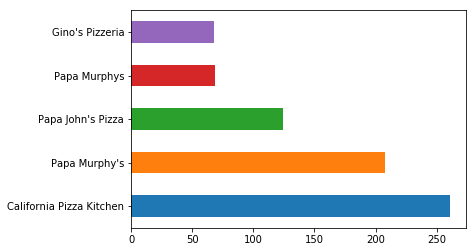

In [6]:
yu=pa['name'].value_counts()
ti=yu.head()
ti.plot(kind="barh")

### This analysis shows the list of top 5 oulets with highest branches and it also clarifies that California Pizza Kitchen has max branches in U.S.

## Analysis 2: Which city has max outlets?

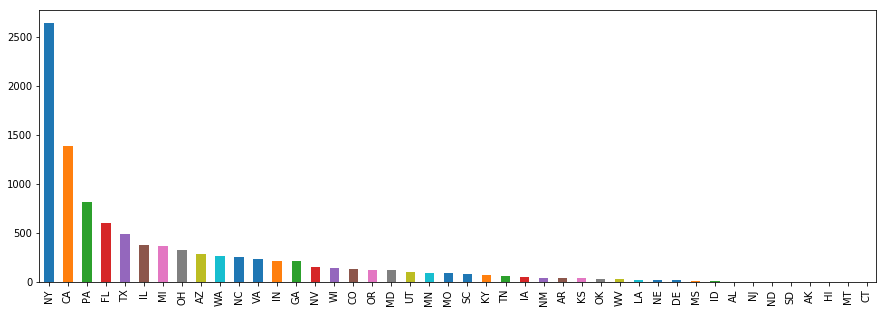

In [7]:
cf=pa['province'].value_counts()
cf.plot(kind='bar',figsize=(15,5))

### From the graph it is clear that new york city has more than 2500 pizza oulets.

## Analysis 3: Which pizza outlets can you find in New York City?

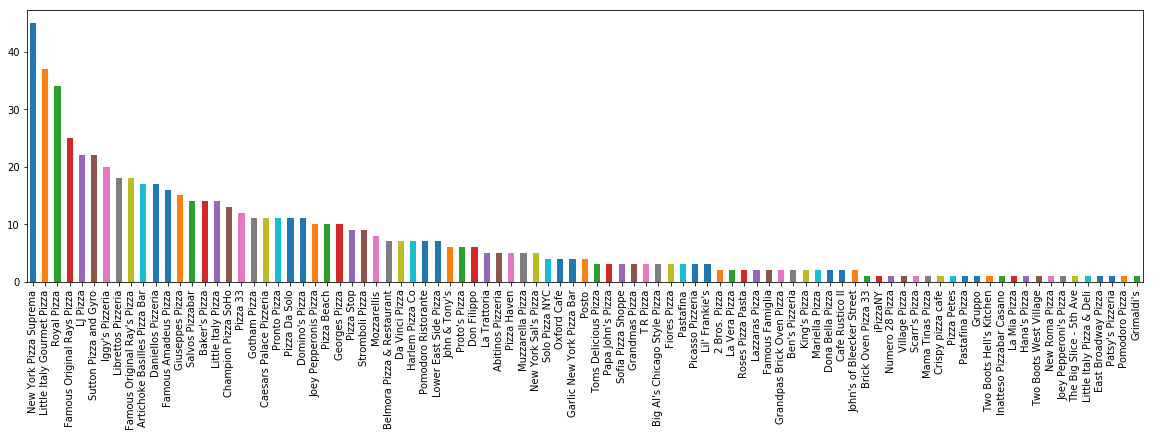

In [32]:
mo = pa['city'] == "New York"
mo = pa[mo]
mf=mo['name'].value_counts()
mf.plot(kind='bar',figsize=(20,5))

### This plot shows the list of pizza outlets in New York City.New York pizza suprema has more than 40 outlets in New York.

## Analysis 4: Which Cities have 'Domino's Pizza' outlets?

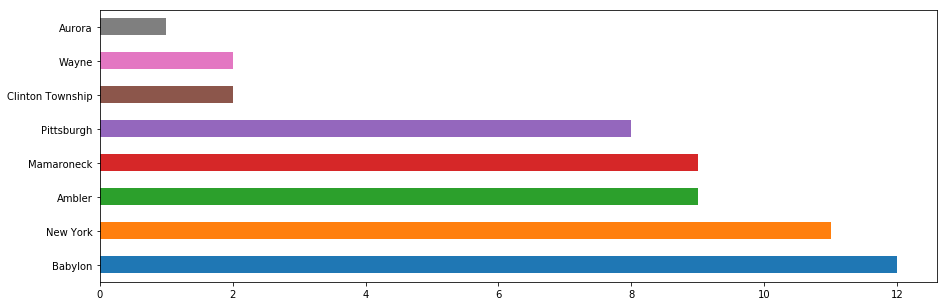

In [10]:
mo = pa['name'] == "Domino's Pizza"
mo = pa[mo]
mf=mo['city'].value_counts()
mf.plot(kind='barh',figsize=(15,5))

### This analysis shows list of cities served by Dominos. Babylon is highly served by Dominos.

## Analysis 5: Which Cities have 'Pizza Hut' outlets?

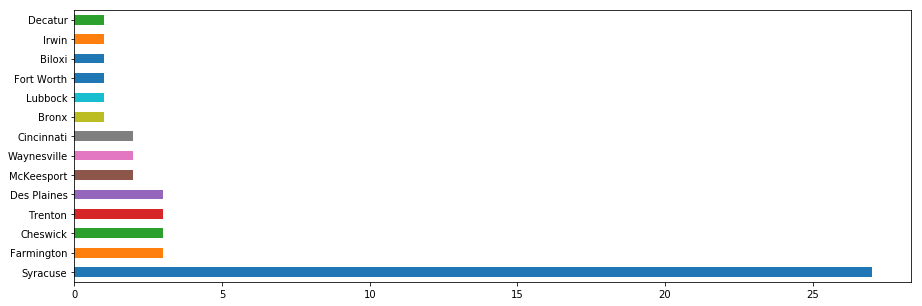

In [12]:
mo = pa['name'] == "Pizza Hut"
mo = pa[mo]
mf=mo['city'].value_counts()
mf.plot(kind='barh',figsize=(15,5))

### This analysis shows list of cities served by pizza hut. Syracuse has more than 25 pizza hut outlets.

## Analysis 6: Cheapest pizza in town!

In [13]:
pa.sort_values(by='priceRangeMax',ascending=True,inplace=True)
pa.head()

,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
606,2015-11-19 22:51:38,2019-04-15 07:00:57,1451 E Columbia Ave,"Pizza,Restaurant,Military Attorneys,Pizza Plac...","Retail,Accommodation & Food Services",Philadelphia,US,us/pa/philadelphia/1451ecolumbiaave/-2067778690,39.974466,-75.132690,...,USD,"2018-06-17T19:21:50.620Z,2018-04-26T18:06:52.8...",NaN,7 2 Medium Cheese Pizzas ampamp 1 2 Liter Soda,The Pizza Shop,19125,USD,0,7,PA
605,2015-11-19 22:51:38,2019-04-15 07:00:57,1451 E Columbia Ave,"Pizza,Restaurant,Military Attorneys,Pizza Plac...","Retail,Accommodation & Food Services",Philadelphia,US,us/pa/philadelphia/1451ecolumbiaave/-2067778690,39.974466,-75.132690,...,USD,"2018-04-26T18:06:52.884Z,2018-06-17T19:21:50.6...",NaN,Pizza Steak,The Pizza Shop,19125,USD,0,7,PA
4000,2015-10-19 22:41:36,2018-12-09 01:42:23,8232 Carnegie Ave,"Pizza,Pizza Place,Pizza Place Fairfax",Accommodation & Food Services,Cleveland,US,us/oh/cleveland/8232carnegieave/-66705643,41.503402,-81.629316,...,USD,2016-03-30T04:17:00.000Z,NaN,Family 3 Item Pizza,Pizza Pan,44103,USD,0,10,OH
4002,2015-10-19 22:41:36,2018-12-09 01:42:23,8232 Carnegie Ave,"Pizza,Pizza Place,Pizza Place Fairfax",Accommodation & Food Services,Cleveland,US,us/oh/cleveland/8232carnegieave/-66705643,41.503402,-81.629316,...,USD,2016-03-30T04:17:00.000Z,NaN,Large 12in 1 Item Pizza With 20oz Coke,Pizza Pan,44103,USD,0,10,OH
4001,2015-10-19 22:41:36,2018-12-09 01:42:23,8232 Carnegie Ave,"Pizza,Pizza Place,Pizza Place Fairfax",Accommodation & Food Services,Cleveland,US,us/oh/cleveland/8232carnegieave/-66705643,41.503402,-81.629316,...,USD,2016-03-30T04:17:00.000Z,"Hot sauce, choice of garlic butter or red sauc...",Buffalo Chicken Pizza,Pizza Pan,44103,USD,0,10,OH


In [14]:
leastexpcity=pa[pa['priceRangeMax'] <=7]
leastexpcity[['city']]

,city
606,Philadelphia
605,Philadelphia


### This analysis shows that Philadelphia sells the cheapest pizza.

## Analysis 7: Most expensive pizza in town

In [15]:
pa.sort_values(by='priceRangeMax',ascending=False,inplace=True)
pa.head()

,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
692,2017-06-29 20:04:30,2019-04-15 06:24:09,18851 NE 29th Ave Ste 102,"Italian Restaurant,Pizza Place",Accommodation & Food Services,Miami,US,us/fl/miami/18851ne29thaveste102/-1477481725,25.950503,-80.141549,...,USD,"2018-01-27T22:06:49.538Z,2018-01-11T05:36:14.5...",NaN,Pizza Caprese,La Montanara Restaurant,33180,USD,40,55,FL
2614,2015-10-23 01:49:15,2019-03-28 22:26:00,2561 53rd Ave,"Pizza,Restaurant,Gastropub,Pizza Place,Restaur...",Accommodation & Food Services,Bettendorf,US,us/ia/bettendorf/256153rdave/51548538,41.574694,-90.496681,...,USD,2016-03-29T04:56:00.000Z,"Roasted Poblanos, Bacon, Scallions and Cheddar",Mac N Cheese Pizza,Crust Stone Oven Pizza,52722,USD,50,55,IA
9763,2016-03-21 00:22:55,2018-01-29 05:19:53,1577 Coburg Rd,Pizza Place,Accommodation & Food Services,Eugene,US,us/or/eugene/1577coburgrd/1449709079,44.079133,-123.067781,...,USD,2016-03-21T00:23:00.000Z,"Refried bean, onion, lean beef, taco chip, let...",Taco Pizza,Papa's Pizza,97401,USD,40,55,OR
5805,2015-12-02 18:27:08,2018-06-21 17:13:45,102 Berry St,"Italian Restaurant,Restaurant,Italian Restaura...",Accommodation & Food Services,Brooklyn,US,us/ny/brooklyn/102berryst/-1206142467,40.719044,-73.958595,...,USD,"2018-06-15T21:00:56.124Z,2018-05-07T11:53:41.5...",San marzano tomatoes fior di latte thinly slic...,Eggplant Zucchini Pizza,Oregano,11211,USD,50,55,NY
5803,2015-12-02 18:27:08,2018-06-21 17:13:45,102 Berry St,"Italian Restaurant,Restaurant,Italian Restaura...",Accommodation & Food Services,Brooklyn,US,us/ny/brooklyn/102berryst/-1206142467,40.719044,-73.958595,...,USD,"2018-05-07T11:53:41.558Z,2018-05-26T18:11:34.2...",White pizza topped with mushrooms sausage ampa...,Boscaiola Pizza,Oregano,11211,USD,50,55,NY


In [8]:
mosty=pa[pa['priceRangeMax'] >=55]
mosty['city'].unique().tolist()

['Miami',
 'Bettendorf',
 'Portland',
 'San Antonio',
 'Brooklyn',
 'Chicago',
 'Atlanta',
 'Peoria',
 'Eugene']

### From this analysis we can sum up that most expensive pizza can be bought from above listed cities.

## Analysis 8:  Which type of pizza is frequently bought from 'Pizza Hut' outlet?

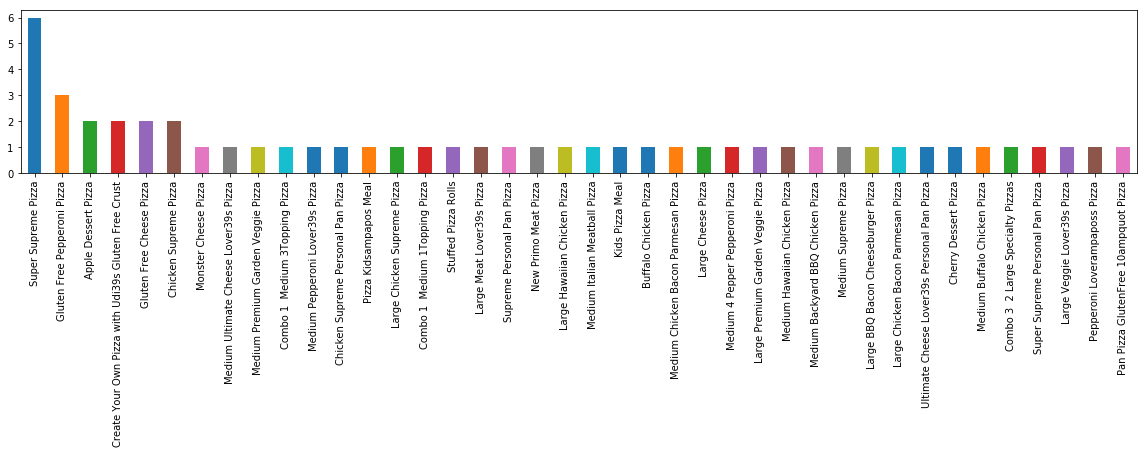

In [13]:
mo = pa['name'] == "Pizza Hut"
mo = pa[mo]
mf=mo['menus.name'].value_counts()
mf.plot(kind='bar',figsize=(20,3))

### From above analysis it is clear that Super Supreme Pizza is bought most frequently from pizza hut.

## Analysis 9:  Which type of pizza is frequently bought from La Vals outlet?

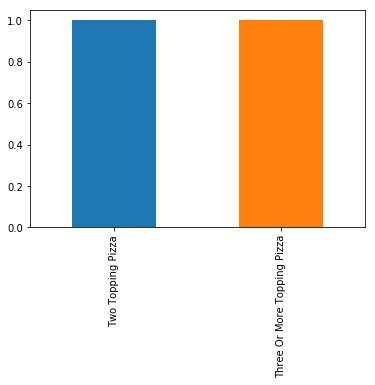

In [37]:
mo = pa['name'] == "La Vals"
mo = pa[mo]
mf=mo['menus.name'].value_counts()
mf.plot.bar()

### Above analysis shows that Two,three or more Topping pizza is preferred at La Vals pizza

## Analysis 10:Which type of pizza is being sold the most in the U.S. ?

In [20]:
ta=pa['menus.name'].value_counts()
hu=ta.head()

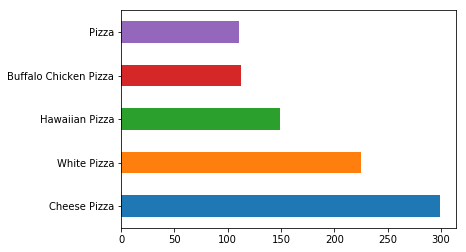

In [21]:
hu.plot(kind='barh')

### This analysis shows the list of Top 5 most selling pizzas in U.S..It also clarifies that cheese pizza is favourite pizza of most  of the U.S.Citizens

## Analysis 11: Where can we find Domenicos Jr outlets ?

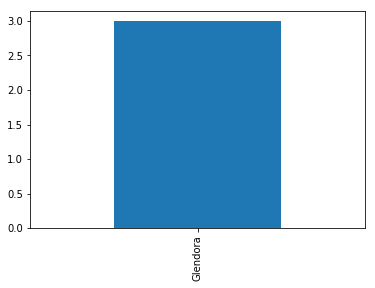

In [24]:
mo = pa['name'] == "Domenicos Jr"
mo = pa[mo]
mf=mo['city'].value_counts()
mf.plot(kind='bar')

### From above we came to know that Domenicos Jr is present only in Glendora.

## Analysis 12: Where can we get pizza in Tallahassee?

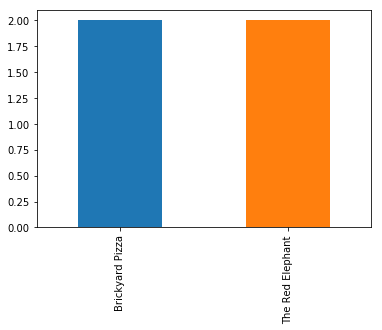

In [9]:
mo = pa['city'] == "Tallahassee"
mo = pa[mo]
mf=mo['name'].value_counts()
mf.plot(kind='bar')

### This analysis shows that people in Tallahassee can buy pizza from these two outlets only.

## Analysis 13: Which cities have 'California Pizza Kitchen' outlets ?

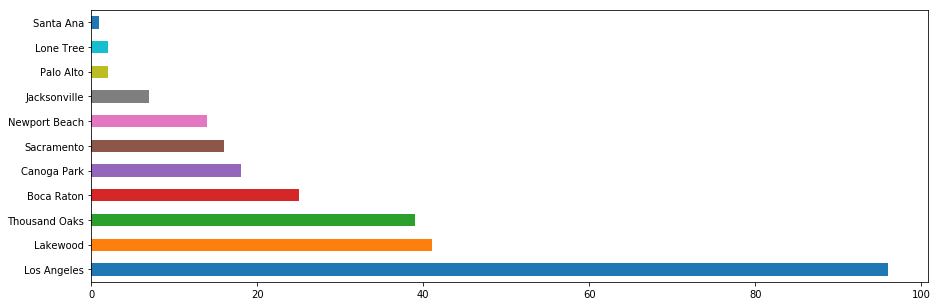

In [21]:
mo = pa['name'] == "California Pizza Kitchen"
mo = pa[mo]
mf=mo['city'].value_counts()
mf.plot(kind='barh',figsize=(15,5))

### The above analysis shows California Pizza Kitchen outlets can be found in above listed cities. Los Angeles is highly served by California Pizza Kitchen with more than 90 outlets.

## Analysis 14: Which category of pizza oulet is most preferred?

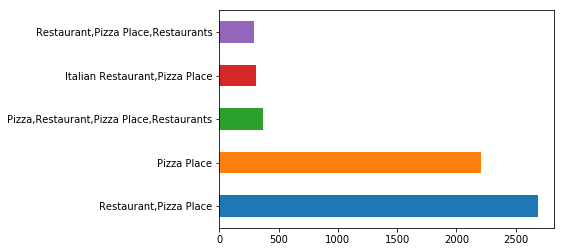

In [26]:
yu=pa['categories'].value_counts()
ti=yu.head()
ti.plot(kind="barh")

### This analysis shows that most of the U.S.Citizens prefer outlets falling under category of Restaurant or Pizza Place. 

## Analysis 15: Which outlet have their menu page URL for every branches seprately?

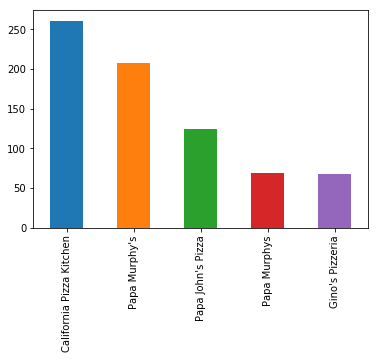

In [40]:
mo = pa['menuPageURL'] != ""
mo = pa[mo]
mf=mo['name'].value_counts()
yu=mf.head()
yu.plot.bar()

### This plot shows the Top 5 pizza outlets having seperate URL for every branch. California Pizza Kitchen is having URL for max of its branches.

## Analysis 16: How much does an individual spend on pizza?

In [10]:
fu=sum(pa['priceRangeMax'])//len(pa['priceRangeMax'])
fu

27

### This analysis clarifies that an individual U.S.Citizen spends $27 in buying pizza 

## Analysis 17: Where can you get pizza in U.S.? 

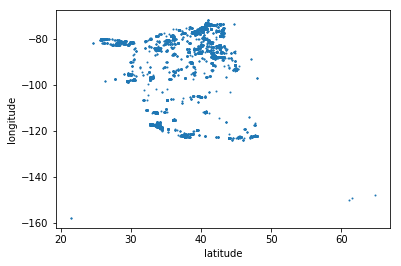

In [29]:
mdf = pa[['city','latitude','longitude']]
mdf.plot.scatter(x ='latitude',y='longitude',s=1,alpha=1)

### This plot shows the map where you can get pizza in U.S.

## Analysis 18: Which outlets were opened after 2017?

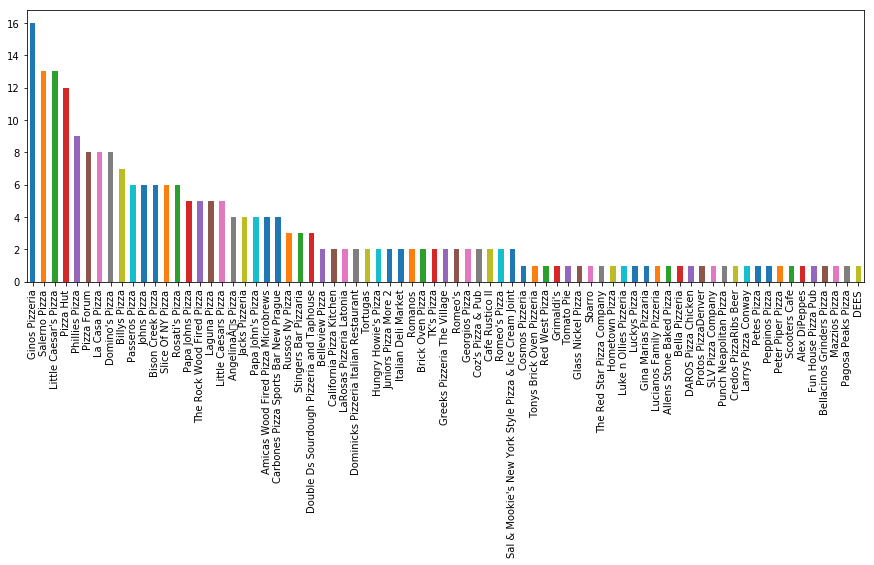

In [22]:
mo = pa['dateAdded'] >= "2018"
mo = pa[mo]
mf=mo['name'].value_counts()
mf.plot(kind='bar',figsize=(15,5))

### This plot shows the names of pizza outlets which were opened in or after 2018. 

## Analysis 19 : Which Postal Code has how many outlets?

In [33]:
pa['postalCode'].value_counts()

10016    102
11367     92
90049     67
90028     65
98109     60
11215     59
10019     57
89509     55
10065     48
84095     47
10007     47
11222     46
11803     46
10001     45
11208     44
94619     44
11226     44
85207     42
10003     42
90712     41
11217     41
97477     40
89052     39
91362     39
14850     38
14075     37
90807     36
11372     35
14150     35
54703     35
        ... 
92021      1
34285      1
32765      1
98516      1
29301      1
98122      1
29466      1
95401      1
54868      1
75961      1
72921      1
85378      1
70448      1
92629      1
72764      1
12538      1
19709      1
22205      1
94523      1
97204      1
53027      1
21043      1
17601      1
83301      1
86001      1
30046      1
48341      1
84606      1
91776      1
48073      1
Name: postalCode, Length: 1771, dtype: int64

### This analysis shows that the postalCode having maximum outlet is 10016

## Analysis 20 : Number of restaurants serving every city.

In [34]:
most_service = pa['primaryCategories'] == "Accommodation & Food Services"
most_service = pa[most_service]
most_service['city'].value_counts()

New York          655
Brooklyn          460
Los Angeles       193
Buffalo           178
Philadelphia      138
Chicago           133
Seattle           131
Flushing          124
San Francisco     110
Bronx              88
Springfield        85
Charlotte          84
Pittsburgh         74
Mesa               73
Austin             66
Cleveland          65
Reno               65
Atlanta            64
Sacramento         60
Indianapolis       59
Columbus           55
Astoria            55
Dallas             54
Syracuse           53
Long Beach         50
Baltimore          50
Boulder            50
San Diego          49
South Jordan       47
San Antonio        47
                 ... 
Midland             1
Alamosa             1
Poway               1
Avon                1
Westchester         1
Hartford            1
Allison Park        1
Coronado            1
Indianola           1
Mandeville          1
Hawthorne           1
Boone               1
Allentown           1
Eureka Springs      1
Novi      

### From this analysis we got to know that New York has the maximum serving restaurants i.e., 655.

## Analysis 21:  Which type of pizza is frequently bought from Papa Morphys outlet?

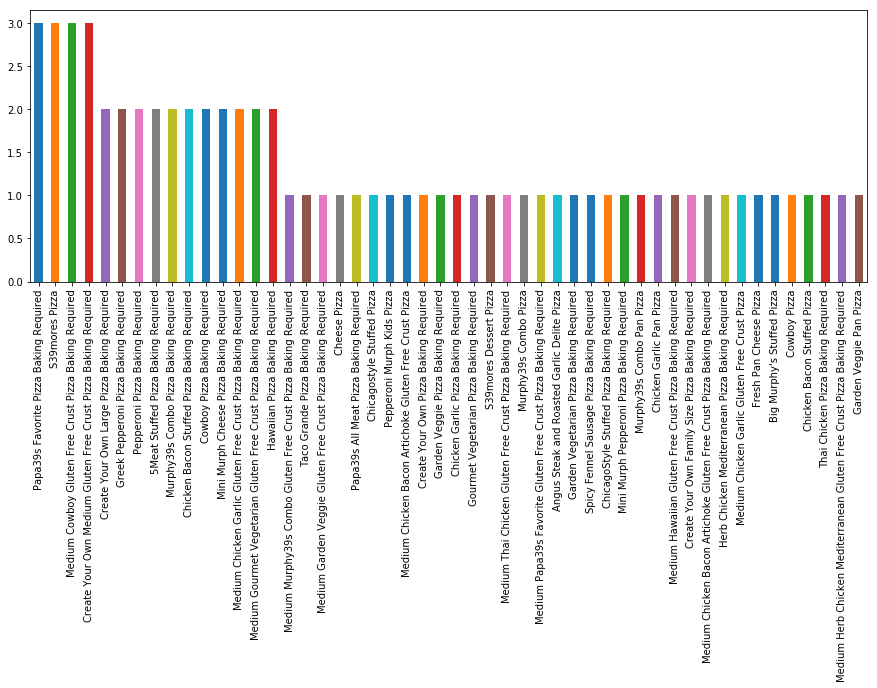

In [36]:
mo = pa['name'] == "Papa Murphys"
mo = pa[mo]
mf=mo['menus.name'].value_counts()
mf.plot(kind='bar',figsize=(15,5))

### This graph gives the idea which pizzas are being bought frequently from Papa Morphys.

## Analysis 22: To find total branches of pizza reataurants.

In [37]:
pa['name'].value_counts()

California Pizza Kitchen                  261
Papa Murphy's                             208
Papa John's Pizza                         124
Papa Murphys                               69
Gino's Pizzeria                            68
Pirates Pizza                              55
Domino's Pizza                             54
Round Table Pizza                          54
Olympia Pizza and Spaghetti House          54
Pizza Hut                                  51
Brick Oven                                 47
Papa Johns Pizza                           47
New York Pizza Suprema                     45
zpizza                                     44
Mario's Pizzeria                           43
Sourdough Pizza                            42
Roma Pizza                                 42
Coburg Pizza Company                       40
Jet's Pizza                                38
Little Italy Gourmet Pizza                 37
Butera's                                   37
Angelo's Pizza                    

### This Analysis shows that California Pizza kitchen has most number of servicing outlets.

## Analysis 23 : What's the median price of a large plain pizza?

In [38]:
e=pa['menus.name']=='Large Plain Pizza'
e=pa[e]
e['menus.amountMax'].median()

14.25

### This Analysis shows that the median price of a large plain pizza across the U.S. is $ 14.25

## Analysis 24 : What kind of Pizzas do restaurants sell in MD province of the U.S. ?

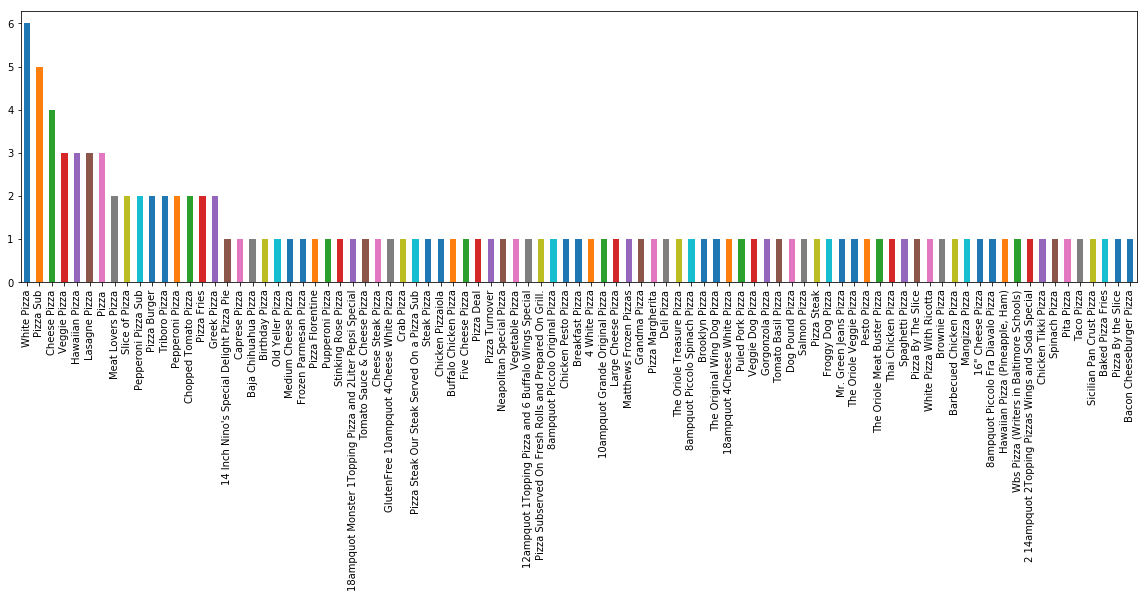

In [24]:
mt = pa['province'] == "MD"
mt = pa[mt]
mt['menus.name'].value_counts().plot(kind='bar',figsize=(20,5))

### This Analysis shows the kind of Pizzas do restaurants sell in MD province.Citizens of MD provience love white pizza.

## Analysis 25 : Where can you find White Pizza?

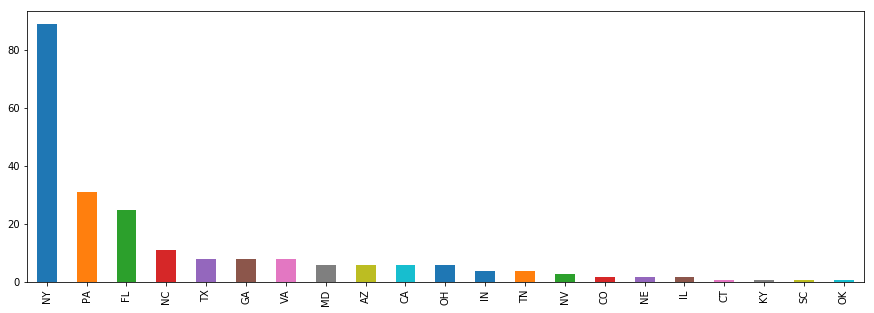

In [30]:
mo = pa['menus.name'] == "White Pizza"
mo = pa[mo]
mf=mo['province'].value_counts()
mf.plot(kind='bar',figsize=(15,5))

### This Analysis shows that the above listed province sell White Pizza. White pizza is easily available for people in NY province.